## 爬取 Google Play 上的評論

In [8]:
import time
from bs4 import BeautifulSoup
import sys, io
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.proxy import *
import pandas as pd 

no_of_reviews = 1000
non_bmp_map = dict.fromkeys(range(0x10000, sys.maxunicode + 1), 0xfffd)
driver = webdriver.Chrome(r"chromedriver.exe")
wait = WebDriverWait( driver, 10 )

# Append your app store urls here
urls = ["https://play.google.com/store/apps/details?id=com.cathaybk.koko"]
for url in urls:

    driver.get(url)

    page = driver.page_source

    soup_expatistan = BeautifulSoup(page, "html.parser")

    expatistan_table = soup_expatistan.find("h1", class_="AHFaub")

    print("App name: ", expatistan_table.string)

    expatistan_table = soup_expatistan.findAll("span", class_="htlgb")[4]

    print("Installs Range: ", expatistan_table.string)

    soup_histogram = soup_expatistan.find("div", class_="VEF2C")

    rating_bars = soup_histogram.find_all('div', class_="mMF0fd")

    for rating_bar in rating_bars:
        print("Rating: ", rating_bar.find("span").text)
        print("Rating count: ", rating_bar.find("span", class_="L2o20d").get('style'))

    # open all reviews
    url = url+'&showAllReviews=true'
    driver.get(url)
    time.sleep(5) # wait dom ready
    for i in range(20): #加載更多留言
        for i in range(5):
            time.sleep(1)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        try:
            driver.find_element_by_xpath('//div[@class="U26fgb O0WRkf oG5Srb C0oVfc n9lfJ M9Bg4d"]').click()
        except:
            try:
                driver.find_element_by_xpath('//div[@class="U26fgb O0WRkf oG5Srb C0oVfc n9lfJ"]').click()
            except:
                pass
    page = driver.page_source

    soup_expatistan = BeautifulSoup(page, "html.parser")
    expand_pages = soup_expatistan.findAll("div", class_="d15Mdf")
    counter = 1
    
    list_of_comments = []
    for expand_page in expand_pages:
        try:
            print("\n===========\n")
            print("review："+str(counter))
#             print("Author Name: ", str(expand_page.find("span", class_="X43Kjb").text))
#             print("Review Date: ", expand_page.find("span", class_="p2TkOb").text)
            reviewer_ratings = expand_page.find("div", class_="pf5lIe").find_next()['aria-label'];
            reviewer_ratings = reviewer_ratings.split('(')[0]
            reviewer_ratings = ''.join(x for x in reviewer_ratings if x.isdigit())
#             print("Reviewer Ratings: ", reviewer_ratings)
#             print("Review Body: ", str(expand_page.find("div", class_="UD7Dzf").text))
            developer_reply = expand_page.find_parent().find("div", class_="LVQB0b")
            
            #寫入DataFrame
            ndf = pd.DataFrame([{'Review':str(counter),
                         'Author Name':str(expand_page.find("span", class_="X43Kjb").text),
                         'Review Date':expand_page.find("span", class_="p2TkOb").text,
                         'Ratings':reviewer_ratings,
                         'Content':str(expand_page.find("div", class_="UD7Dzf").text)}],
                        columns = ['Review', 'Author Name', 'Review Date', 'Ratings','Content'])
            list_of_comments.append(ndf)
            counter+=1
        except:
            pass

App name:  KOKO
Installs Range:  100,000+
Rating:  5
Rating count:  width: 100%
Rating:  4
Rating count:  width: 10%
Rating:  3
Rating count:  width: 2%
Rating:  2
Rating count:  width: 1%
Rating:  1
Rating count:  width: 5%


review：1
Author Name:  hwe jan
Review Date:  2021年4月28日
Reviewer Ratings:  2
Review Body:   人脸辨識有问题samsungA51 5g 不相容出现粉红色不出现绿色閞(Ok)!希望 国泰甲快改正更新!(跟三星公司确 过android10. **尚未改进!2020/12/12 无改 想不到kokO问题超多! 想不到国泰金控这么大的公司屈屁脸部辨識搞不好KOKO!技術团队超羞/ 无改善.(2021/1/21) 人脸辨識有问题( 2021/4/28) 无改进！


review：2
Author Name:  娮娮
Review Date:  2021年4月28日
Reviewer Ratings:  4
Review Body:   頁面清楚，操作方便，但是希望能盡快新增線上文字客服的部分~ 這樣有問題能更快的解決也不用擔心客服電話沒接到的問題。


review：3
Author Name:  TP C
Review Date:  2021年4月6日
Reviewer Ratings:  1
Review Body:   有夠爛的，都申請完多久了，還沒結果，當想起有這件事就點APP查詢進度，永遠停留在審核中，這問題好像不是只有我在反應，KOKO是我同時申辦各家數位帳戶的第一順位先完成，其他家甚至晚一週辦的也都已快速通過並開卡完成，至於不少人反應的優惠福利都比別家少這我倒不太在乎，平台完善好用，服務有效率比較重要，但我真懷疑國泰有心在數位銀行這領域經營嗎，說真的現在這樣我已經不想要了。


review：4
Author Name:  DuoReMi
Review Date:  2021年4月6日
Reviewer Ratings: 


review：80
Author Name:  Tom Huang
Review Date:  2021年3月14日
Reviewer Ratings:  1
Review Body:   效率極差 寄個信用卡 兩個禮拜都還沒寄到


review：81
Author Name:  劉育昇
Review Date:  2021年4月7日
Reviewer Ratings:  5
Review Body:   方便，轉帳不用手續費


review：82
Author Name:  賴晨禾
Review Date:  2021年4月7日
Reviewer Ratings:  5
Review Body:   希望能有指紋轉帳


review：83
Author Name:  李宗翰
Review Date:  2021年2月22日
Reviewer Ratings:  3
Review Body:   怎麼一直閃退 沒了 謝謝你們喔


review：84
Author Name:  Christine Jong
Review Date:  2021年4月7日
Reviewer Ratings:  2
Review Body:   差，操作介面難用


review：85
Author Name:  Jhih-you Syu
Review Date:  2021年4月11日
Reviewer Ratings:  2
Review Body:   記帳功能越來越糟


review：86
Author Name:  Sin Hua Chen
Review Date:  2021年3月12日
Reviewer Ratings:  5
Review Body:   很好用還能聊天 即時轉帳 功能多變


review：87
Author Name:  陳菡琪
Review Date:  2020年11月19日
Reviewer Ratings:  5
Review Body:   建議 1.增加繳費功能，常用的繳費帳戶不用每次自己輸入。現在帳單都e化了，哪找台灣pay QR CODE。 2.如果技術允許把發票載具或掃描功能加入，讓記帳功能更完整，也可以綁定中獎轉帳 優點：小豬的金額隱藏方式很可愛，有記帳功能、消費分析 找到常用帳戶功能了，方便許多：） Koko真的很有心

Review Body:   建議匯款認證直接跟登入一樣，使用pixel臉部辨識就好，用相機辨識度低又不安全


review：160
Author Name:  劉翊卿
Review Date:  2020年12月19日
Reviewer Ratings:  5
Review Body:   koko卡很好用，功用像信用卡，但又不會讓你有債務問題


review：161
Author Name:  陳小葉
Review Date:  2020年12月13日
Reviewer Ratings:  1
Review Body:   系統維護直接連提款卡最基本的提款功能的沒辦法用？


review：162
Author Name:  Audrey Chen
Review Date:  2021年1月25日
Reviewer Ratings:  5
Review Body:   要設定常用帳號時會一直跳掉 QAQ //問題已解決 感謝！


review：163
Author Name:  Ari's Studio艾利計劃中
Review Date:  2020年12月11日
Reviewer Ratings:  5
Review Body:   方便簡潔又不失設計感的介面 非常人性化且實用


review：164
Author Name:  凱能陳
Review Date:  2021年2月12日
Reviewer Ratings:  2
Review Body:   動態密碼回傳時間太久。


review：165
Author Name:  黃貓咪
Review Date:  2021年1月25日
Reviewer Ratings:  5
Review Body:   使用體驗愈來愈完善，現在也可匯出電子存褶了


review：166
Author Name:  Andy Liu
Review Date:  2021年1月19日
Reviewer Ratings:  5
Review Body:   使用操作很方便，免費跨轉次數超多！


review：167
Author Name:  Kuan Shu-Hwei
Review Date:  2021年2月20日
Reviewer Ratings:  5
Review Body:   很實用友善的操作介面



review：238
Author Name:  高岡屋
Review Date:  2021年1月26日
Reviewer Ratings:  5
Review Body:   好用，改版更好用


review：239
Author Name:  高螞蟻
Review Date:  2020年12月7日
Reviewer Ratings:  4
Review Body:   簡單明瞭 好操作


review：240
Author Name:  莊淑雯
Review Date:  2021年2月16日
Reviewer Ratings:  5
Review Body:   好友轉帳超方便


review：241
Author Name:  飛雲
Review Date:  2020年12月7日
Reviewer Ratings:  5
Review Body:   好用，優惠多


review：242
Author Name:  陳小豬
Review Date:  2020年11月24日
Reviewer Ratings:  5
Review Body:   很方便很好用


review：243
Author Name:  陳麗華
Review Date:  2021年1月5日
Reviewer Ratings:  5
Review Body:   轉帳方便又實用


review：244
Author Name:  蕭蕭
Review Date:  2021年1月4日
Reviewer Ratings:  5
Review Body:   無法備註使用明細有點可惜


review：245
Author Name:  林芯羽
Review Date:  2021年2月7日
Reviewer Ratings:  5
Review Body:   好用 介面直覺 功能體貼


review：246
Author Name:  陳天名
Review Date:  2020年12月16日
Reviewer Ratings:  5
Review Body:   好用~而且都會網路馬上提醒


review：247
Author Name:  I-hui Lin
Review Date:  2020年12月22日
Reviewer Ratings:  4
Revi

Reviewer Ratings:  4
Review Body:   這隻APP整體來說很不錯用!尤其可以直接投保旅平險的部分更是大大加分!!!但是,甚麼時候快速登入的部分才會支援Pixel 4 的臉部登入啊?國外的銀行都已經開始陸續支援了!!身為台灣數一數二的國泰金控旗下的KOKO怎麼還不支援Pixel 4的臉部辨識登入呢?


review：303
Author Name:  Weichien Kung
Review Date:  2020年3月6日
Reviewer Ratings:  3
Review Body:   轉帳介面方便實用，但新版APP的字體太小了，希望能改善這個困擾，(舊版的APP的字就剛好，不會太小) 謝謝您的回答, 我的手機設定已經是設定最大的( 使用舊版APP時就是設定了最大了, 但舊版的APP字體看起來就不會很小)


review：304
Author Name:  雪熙
Review Date:  2020年10月18日
Reviewer Ratings:  1
Review Body:   我是真的火了…沒更新之前一直都能登入，我連登入都沒辦法，我根本不知道怎麼回報客服，一直說我連線不穩，手機重開，網路也滿格，到底是要我怎樣？ 越登越火，能迅速改善嗎？如果更新連登不進去都做不到，要這個APP幹嘛…😡


review：305
Author Name:  Regina Chang
Review Date:  2018年12月3日
Reviewer Ratings:  2
Review Body:   記帳功能的週期是否可以自訂後儲存 一定要強制都從每個月1號開始 顯示嗎？如果結算日在月底 下個月月初時就很容易忽略上個月月底的消費金額 如果說到信用卡未出帳帳單內查詢 又可能店家尚未請款 而沒有呈現 只是想能簡簡單單的看到自己每一個週期的消費總額…


review：306
Author Name:  No Name
Review Date:  2019年8月8日
Reviewer Ratings:  2
Review Body:   之前提出的問題超過半年了還是沒有改善：要提供帳戶資訊給別人時，所提供的 "複製" 按鈕竟然只有複製帳號，銀行名稱、銀行代碼還要自己手動打，一點都不方便。另外發現用 QR cide加入別人帳號時，不能掃相

## 將評論存成 GooglePlay_Comments.csv

In [25]:
comments = pd.concat(list_of_comments, ignore_index=True)
comments.to_csv('GooglePlay_Comments.csv',encoding='utf_8_sig')

## 讀取 GooglePlay_Comments.csv

In [1]:
import pandas as pd
df=pd.read_csv('Richart.csv',encoding='utf_8_sig')
df

NameError: name 'pd' is not defined

In [27]:
# !pip install wget
import wget,os
#os.mkdir(mydrive+ "chinese") # you have to remove this line if the chinese folder is exist.
url_bigdict = 'https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big'
wget.download(url_bigdict)

100% [..........................................................................] 8583143 / 8583143

'dict.txt (1).big'

## 中文加英文 stop words

In [30]:
import requests
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt'
r = requests.get(url, allow_redirects=True)
open('chinese_stopwords.txt', 'wb').write(r.content)
zn_stopwords_path = "chinese_stopwords.txt" #簡字
zn_stopwords = [line.strip() for line in open(zn_stopwords_path, 'r', encoding='utf-8').readlines()]

cn_stopwords_path = "chinese_stopwords2.txt" #繁體字
cn_stopwords = [line.strip() for line in open(cn_stopwords_path, 'r', encoding='utf-8').readlines()]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english') #英文
stopwords = cn_stopwords+en_stopwords+zn_stopwords
# print(stopwords)

[nltk_data] Downloading package stopwords to C:\Users\LINDA
[nltk_data]     YEH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 將評論存成一個字串

In [1]:
import pandas as pd # 引用套件並縮寫為 pd  
df = pd.read_csv('Richart.csv', encoding='utf-8')  
text=''
for i in df['Content']:
    text+=i

TypeError: can only concatenate str (not "float") to str

## 斷詞，並移除 stop words 和 normalization

In [32]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
# !pip install jieba
import nltk, re 
import jieba
# hamlet_text = open('output.txt',encoding='utf-8').read().lower()
nltk.download('punkt')
tokens = jieba.cut(text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
print(filtered_tokens)

text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
print (text_draw)

[nltk_data] Downloading package punkt to C:\Users\LINDA
[nltk_data]     YEH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LINDAY~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.603 seconds.
Prefix dict has been built successfully.


['人脸', '辨識', '问题', 'samsungA51', '5g', '不相容', '出现', '粉红色', '出现', '绿色', '閞', 'Ok', '希望', '国泰', '甲快', '改正', '更新', '三星公司', '确', 'android10', '尚未', '改进', '2020', '12', '12', '无改', '想不到', 'kokO', '问题', '超多', '想不到', '国泰', '金控', '公司', '屈屁', '脸部', '辨識', '搞不好', 'KOKO', '技術', '团队', '超羞', '改善', '2021', '21', '人脸', '辨識', '问题', '2021', '28', '改进', '頁面', '清楚', '操作', '方便', '希望', '盡快', '新增', '線上', '文字', '客服', '部分', '問題', '解決', '不用', '擔心', '客服', '電話', '接到', '問題', '夠爛', '申請', '完', '多久', '還沒', '想起', '這件', '事', '就點', 'APP', '查詢', '進度', '永遠', '停留', '審核', '這問題', '好像', '反應', 'KOKO', '申辦', '各家', '數位', '帳戶', '第一', '順位', '先', '完成', '家', '晚一', '週辦', '快速', '並開卡', '完成', '反應', '優惠', '福利', '別家少', '這我', '倒', '太', '在乎', '平台', '完善', '好用', '服務', '有效率', '比較', '重要', '真懷疑', '國泰', '有心', '數位', '銀行', '這領域', '經營', '說', '真的', '現在', '已經', '想要', '本行', '舊戶', '今天', '申請', 'KOKO', 'app', '自動', '代入', '英文', '拼音', '貴行', '自動', '翻譯', '貴行', '外幣', '帳戶', '信用卡', '慣用', '英文名字', '耶', '打電話給', '客服', '存款', '部門', '客服', '說', '留在', '銀行', '英文名', '權限改',

## 計算各斷詞出現次數

In [31]:
def term_count(term, token_doc):
    tf = token_doc.count(term)
    return tf

text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
print(text_tf)
freq = nltk.FreqDist(text_tf)
print("Top 10 frequency word", freq.most_common(10))

{'人脸': 2, '辨識': 19, '问题': 3, 'samsungA51': 1, '5g': 1, '不相容': 1, '出现': 2, '粉红色': 1, '绿色': 1, '閞': 1, 'Ok': 1, '希望': 28, '国泰': 2, '甲快': 1, '改正': 1, '更新': 24, '三星公司': 1, '确': 1, '过': 1, 'android10': 1, '尚未': 3, '改进': 2, '2020': 3, '12': 3, '无改': 1, '想不到': 2, 'kokO': 1, '超多': 1, '金控': 1, '这么': 1, '公司': 6, '屈屁': 1, '脸部': 1, '搞不好': 1, 'KOKO': 16, '技術': 2, '团队': 1, '超羞': 1, '无': 2, '改善': 10, '2021': 3, '21': 1, '28': 2, '頁面': 3, '清楚': 6, '操作': 23, '方便': 93, '盡快': 1, '新增': 9, '線上': 2, '文字': 2, '客服': 19, '部分': 8, '問題': 33, '解決': 5, '不用': 18, '擔心': 2, '電話': 2, '接到': 1, '夠爛': 3, '申請': 22, '完': 2, '多久': 3, '還沒': 1, '想起': 1, '這件': 1, '事': 1, '就點': 1, 'APP': 22, '查詢': 6, '進度': 1, '永遠': 1, '停留': 1, '審核': 6, '中': 7, '這問題': 2, '好像': 2, '反應': 7, '申辦': 7, '各家': 1, '數位': 18, '帳戶': 36, '第一': 1, '順位': 1, '先': 5, '完成': 6, '家': 2, '晚一': 1, '週辦': 1, '已': 17, '快速': 14, '並開卡': 1, '人': 22, '優惠': 6, '福利': 1, '別家少': 1, '這我': 1, '倒': 3, '太': 8, '在乎': 1, '平台': 1, '完善': 2, '好用': 43, '服務': 3, '有效率': 1, '比較': 4, '重要': 

## 將斷詞次數存成 frequency_word.csv

In [32]:
import csv
with open('frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

## 生成文字雲

You should consider upgrading via the 'c:\users\linda yeh\anaconda3\python.exe -m pip install --upgrade pip' command.


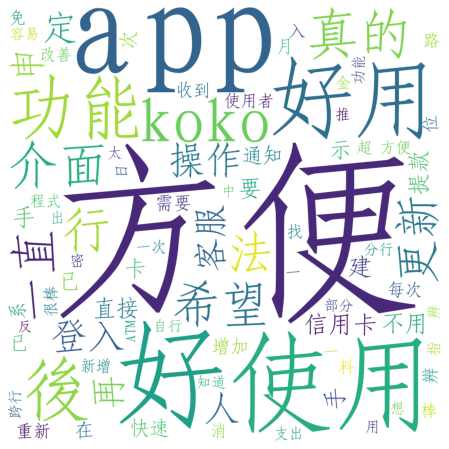

In [33]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font = 'simfang.ttf'
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white",font_path=font)
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")